<a href="https://colab.research.google.com/github/Haebuk/Python_Machine_Learning/blob/master/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

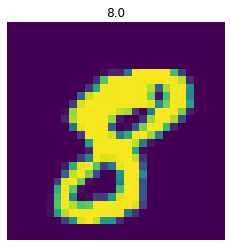

In [ ]:
# Prepare Dataset
# Load data
train = pd.read_csv(r"/content/drive/MyDrive/mnist/train.csv", dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy,
                                                                              test_size=0.2, random_state=42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward()

        optimizer.step()

        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8276817798614502 Accuracy: 70.21428680419922%
Iteration: 1000 Loss: 1.5781872272491455 Accuracy: 76.0952377319336%
Iteration: 1500 Loss: 1.2820342779159546 Accuracy: 78.51190185546875%
Iteration: 2000 Loss: 1.1943033933639526 Accuracy: 80.07142639160156%
Iteration: 2500 Loss: 1.0349150896072388 Accuracy: 81.14286041259766%
Iteration: 3000 Loss: 0.9378059506416321 Accuracy: 82.03571319580078%
Iteration: 3500 Loss: 0.8963439464569092 Accuracy: 82.61904907226562%
Iteration: 4000 Loss: 0.7424800992012024 Accuracy: 83.11904907226562%
Iteration: 4500 Loss: 0.9636154174804688 Accuracy: 83.58333587646484%
Iteration: 5000 Loss: 0.7904230356216431 Accuracy: 84.01190185546875%
Iteration: 5500 Loss: 0.7486173510551453 Accuracy: 84.29762268066406%
Iteration: 6000 Loss: 0.8764584064483643 Accuracy: 84.57142639160156%
Iteration: 6500 Loss: 0.6575664281845093 Accuracy: 84.82142639160156%
Iteration: 7000 Loss: 0.7077260613441467 Accuracy: 85.04762268066406%
Iteration: 7500 Loss: 

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()

        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.7390660643577576 Accuracy: 79.73809814453125%
Iteration: 1000 Loss: 0.45919105410575867 Accuracy: 87.42857360839844%
Iteration: 1500 Loss: 0.217515766620636 Accuracy: 89.69047546386719%
Iteration: 2000 Loss: 0.27343934774398804 Accuracy: 90.55952453613281%
Iteration: 2500 Loss: 0.3090645670890808 Accuracy: 92.03571319580078%
Iteration: 3000 Loss: 0.12513858079910278 Accuracy: 92.53571319580078%
Iteration: 3500 Loss: 0.24840429425239563 Accuracy: 93.22618865966797%
Iteration: 4000 Loss: 0.06903327256441116 Accuracy: 93.69047546386719%
Iteration: 4500 Loss: 0.3269382417201996 Accuracy: 94.36904907226562%
Iteration: 5000 Loss: 0.11205541342496872 Accuracy: 94.61904907226562%
Iteration: 5500 Loss: 0.21978864073753357 Accuracy: 94.67857360839844%
Iteration: 6000 Loss: 0.22274965047836304 Accuracy: 94.92857360839844%
Iteration: 6500 Loss: 0.10204452276229858 Accuracy: 95.33333587646484%
Iteration: 7000 Loss: 0.12850232422351837 Accuracy: 95.72618865966797%
Iteration: 7

In [ ]:
64*64

4096